##Data Description and Exploration

In this Module, we'll cover

- describe
- groupby
- split-apply-combine
- cross tabs and pivot tables
- plotting


In [57]:
import pandas as pd
import numpy as np

%matplotlib inline


Let's get started by reading in the data. 

In [58]:
df = pd.read_csv("/Users/matthewgee/Buildings_Violations_sample_50000_clean.csv")

In [59]:
df.describe()

,Unnamed: 0,id,inspection_number,property_group,latitude,longitude,log_lat,new_lat
count,50000.000000,50000.000000,50000.000000,50000.000000,49952.000000,49952.000000,49952.000000,49952.000000
mean,24999.500000,3300031.329640,6195288.986320,197729.741420,41.845539,-87.673442,3.733983,42.347107
std,14433.901067,1088123.083684,4296079.998463,183132.260836,0.087437,0.057008,0.002090,0.302100
min,0.000000,742158.000000,375113.000000,1001.000000,41.644712,-87.914436,3.729174,41.656007
25%,12499.750000,2400057.500000,2021217.500000,20600.750000,41.771440,-87.714271,3.732213,42.096055
50%,24999.500000,3421152.000000,2813561.000000,142605.000000,41.854001,-87.670709,3.734187,42.348380
75%,37499.250000,4223617.750000,10630848.750000,363929.250000,41.912843,-87.634551,3.735592,42.596900
max,49999.000000,5064815.000000,11597625.000000,663759.000000,42.022645,-87.525898,3.738209,43.014792


In [60]:
pd.crosstab(df.violation_status,df.department_bureau, margins=True)

department_bureau,BOILER,CONSERVATION,CONSTRUCTION EQUIPMENT,DEMOLITION,ELECTRICAL,ELEVATOR,IRON,NEW CONSTRUCTION,PLUMBING,REFRIGERATION,SIGNS,SPECIAL INSPECTION PROGRAM,SPECIAL TASK FORCE,VENTILATION,WATER,All
violation_status,,,,,,,,,,,,,,,,
COMPLIED,538,9247,0,38,407,787,186,113,246,360,24,312,926,311,5,13500
NO ENTRY,0,145,0,0,0,0,0,0,0,0,0,0,0,0,0,145
OPEN,202,23264,6,3147,1144,837,307,1262,1166,572,315,141,3565,402,25,36355
All,740,32656,6,3185,1551,1624,493,1375,1412,932,339,453,4491,713,30,50000


##Groupby

Often we want to examine difference among groups based on categorical values. For this `groupby` is incredibly valuable

In [61]:
df[['department_bureau','longitude','latitude']].groupby("department_bureau").mean()

,longitude,latitude
department_bureau,,
BOILER,-87.670488,41.841682
CONSERVATION,-87.673469,41.846195
CONSTRUCTION EQUIPMENT,-87.684458,41.928653
DEMOLITION,-87.669775,41.807409
ELECTRICAL,-87.670183,41.839267
ELEVATOR,-87.659214,41.900869
IRON,-87.671767,41.906648
NEW CONSTRUCTION,-87.683687,41.863878
PLUMBING,-87.663690,41.817108


##Groupby and Plotting!
 
Often we wan to view an aggregation we've generated. How dow we plot groupby objects?

In [62]:
df.columns

Index([u'Unnamed: 0', u'id', u'violation_last_modified_date', u'violation_date', u'violation_code', u'violation_status', u'violation_status_date', u'violation_description', u'violation_location', u'violation_inspector_comments', u'violation_ordinance', u'inspector_id', u'inspection_number', u'inspection_status', u'inspection_waived', u'inspection_category', u'department_bureau', u'address', u'property_group', u'ssa', u'latitude', u'longitude', u'location', u'log_lat', u'new_lat'], dtype='object')

In [63]:
df[['violation_date','id']].groupby(['violation_date']).count().head()

,id
violation_date,
2006-01-01 00:00:00,10
2006-01-02 00:00:00,51
2006-01-03 00:00:00,16
2006-01-04 00:00:00,36
2006-01-05 00:00:00,20


In [64]:
grouped = df[['violation_date','id']].groupby(['violation_date']).count()

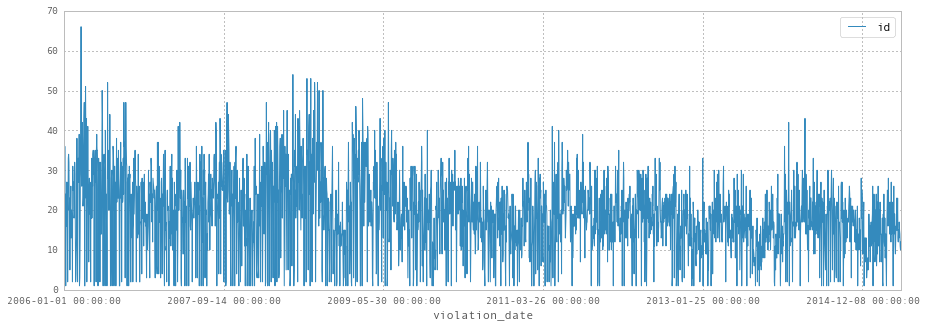

In [65]:
grouped.plot(figsize=(15,5))

Notice the dates. Something looks suspicious. Have we converted them to datetime?

In [66]:
df.dtypes

Unnamed: 0                        int64
id                                int64
violation_last_modified_date     object
violation_date                   object
violation_code                   object
violation_status                 object
violation_status_date            object
violation_description            object
violation_location               object
violation_inspector_comments     object
violation_ordinance              object
inspector_id                     object
inspection_number                 int64
inspection_status                object
inspection_waived                object
inspection_category              object
department_bureau                object
address                          object
property_group                    int64
ssa                              object
latitude                        float64
longitude                       float64
location                         object
log_lat                         float64
new_lat                         float64


NOOOO!!!!

Let's fix that.

In [67]:
df.violation_date = pd.to_datetime(df.violation_date)
df.violation_status_date = pd.to_datetime(df.violation_status_date)
df.violation_last_modified_date = pd.to_datetime(df.violation_last_modified_date)

In [68]:
grouped = df[['violation_date','id']].groupby(['violation_date']).count()

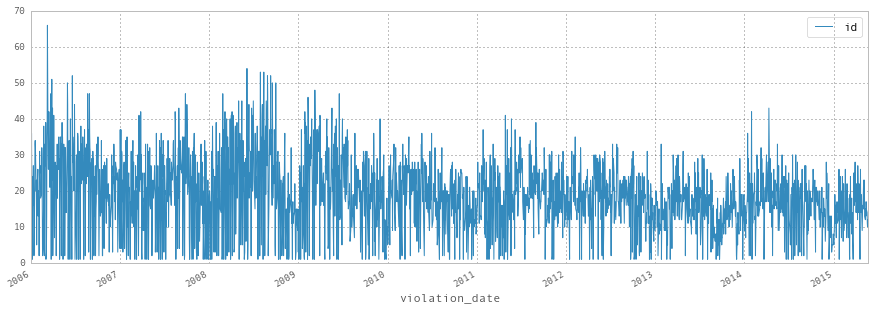

In [69]:
grouped.plot(figsize=(15,5))

Now let's narrow the window that we're looking at. It turns out that having a datetime index to the series can be incredibly helpful.

In [70]:
grouped['2011-01']

,id
violation_date,
2011-01-03,16
2011-01-04,16
2011-01-05,28
2011-01-06,21
2011-01-07,22
2011-01-10,20
2011-01-11,11
2011-01-12,16
2011-01-13,25


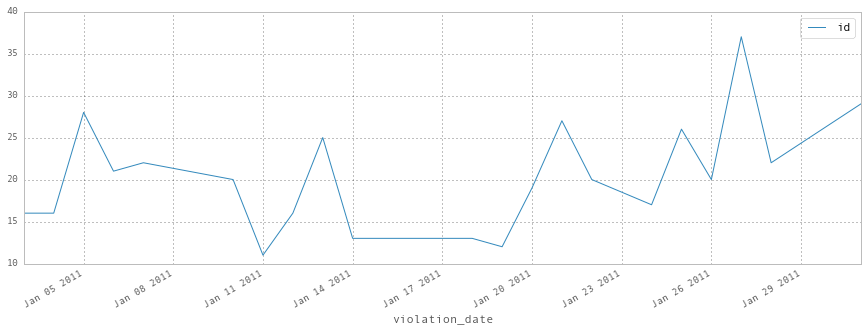

In [71]:
grouped['2011-01'].plot(figsize=(15,5))

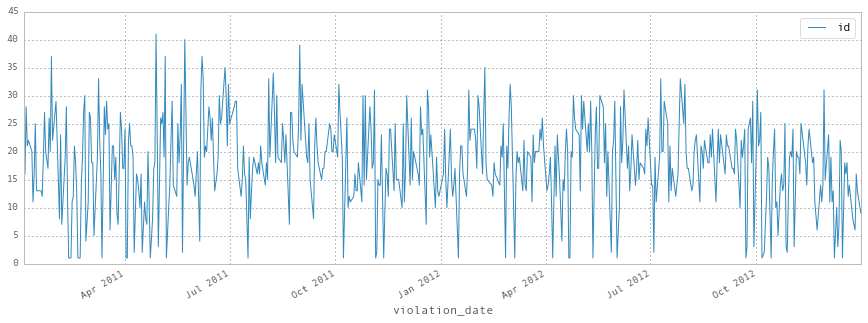

In [72]:
grouped['2011':'2012'].plot(figsize=(15,5))

Now let's try to create a multi-line plot. First we need to do a multi-level groupby.

In [73]:
df1 = df[df['violation_status']=='OPEN']
grouped_open = df1[['violation_date','violation_status','inspection_category','id']].groupby(['violation_date','violation_status','inspection_category']).count()
grouped_open.head()

id
violation_date violation_status inspection_category    
2006-01-01     OPEN             PERIODIC              2
2006-01-02     OPEN             COMPLAINT             1
                                PERIODIC             27
2006-01-03     OPEN             COMPLAINT            14
                                PERIODIC              1

Now we want to pivot this table so that there is a column for each inspection category. I find this a lot easier to do in pandas when what I'm pivoting is a column rather than an index, so let's reindex

In [74]:
grouped_open.reset_index(inplace=True)
grouped_open.head()

,violation_date,violation_status,inspection_category,id
0,2006-01-01,OPEN,PERIODIC,2
1,2006-01-02,OPEN,COMPLAINT,1
2,2006-01-02,OPEN,PERIODIC,27
3,2006-01-03,OPEN,COMPLAINT,14
4,2006-01-03,OPEN,PERIODIC,1


In [75]:
grouped_open_categ = grouped_open.pivot_table('id','violation_date','inspection_category')
grouped_open_categ.head()

inspection_category,COMPLAINT,PERIODIC,PERMIT,REGISTRATION
violation_date,,,,
2006-01-01,NaN,2,NaN,NaN
2006-01-02,1,27,NaN,NaN
2006-01-03,14,1,NaN,NaN
2006-01-04,31,2,NaN,NaN
2006-01-05,14,1,NaN,NaN


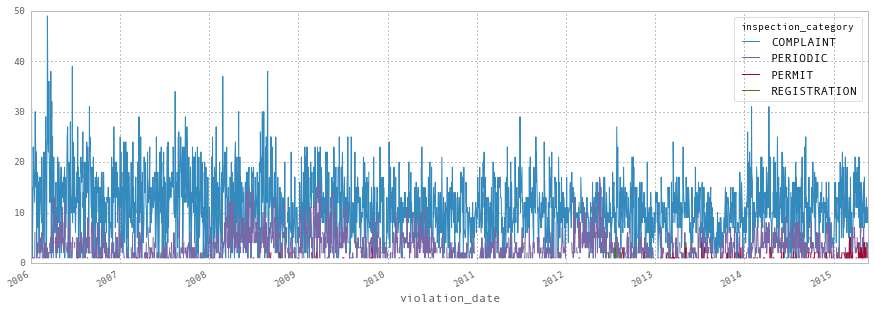

In [76]:
grouped_open_categ.plot(figsize=(15,5))

In [77]:
grouped_open_categ_reverse = pd.melt(grouped_open_categ, id_vars=['violation_date'], value_vars=['COMPLAINT','PERIODIC','PERMIT','REGISTRATION'])

In [78]:
pd.value_counts(grouped_open_categ_reverse.inspection_category)

PERIODIC        2565
PERMIT          2565
COMPLAINT       2565
REGISTRATION    2565
dtype: int64

Let's say we wanted to go ahead and aggregate counts by week or month, not just by day. We can use the handy resample command.

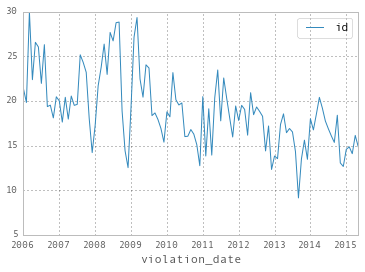

In [79]:
avg_monthly = grouped.resample('M', how='mean')
avg_monthly.plot()

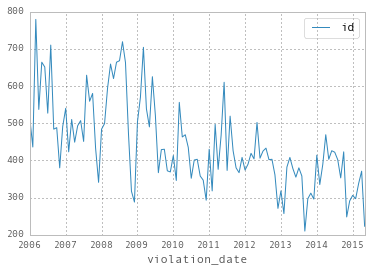

In [80]:
total_monthly = grouped.resample('M', how='sum')
total_monthly.plot()